In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set your folders
hey_tvs_dir = "../DataSet/Audio_dataset/hey_tvs_2sec"
non_hey_tvs_dir = "../DataSet/Audio_dataset/non_hey_tvs_2sec"



In [3]:
# Function to extract features
def extract_features(filepath):
    y, sr = librosa.load(filepath, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    rms = np.mean(librosa.feature.rms(y=y))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfccs, axis=1)  # Mean of each MFCC coefficient
    return {
        'duration': duration,
        'rms': rms,
        'zcr': zcr,
        **{f'mfcc_{i+1}': mfcc for i, mfcc in enumerate(mfcc_mean)}
    }

In [4]:
# Process all files and collect features
data = []

# Hey TVS data
for i in range(1, 201):
    path = os.path.join(hey_tvs_dir, f"{i}.wav")
    features = extract_features(path)
    features['label'] = 'hey_tvs'
    data.append(features)

# Non Hey TVS data
for i in range(201, 410):
    path = os.path.join(non_hey_tvs_dir, f"{i}.wav")
    features = extract_features(path)
    features['label'] = 'non_hey_tvs'
    data.append(features)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV for future reference
df.to_csv("wake_word_features.csv", index=False)

label                hey_tvs  non_hey_tvs
duration count  2.000000e+02   209.000000
         mean   1.984000e+00     2.000000
         std    6.678054e-16     0.000000
         min    1.984000e+00     2.000000
         25%    1.984000e+00     2.000000
         50%    1.984000e+00     2.000000
         75%    1.984000e+00     2.000000
         max    1.984000e+00     2.000000
rms      count  2.000000e+02   209.000000
         mean   1.925256e-02     0.009426
         std    1.070189e-02     0.004320
         min    1.763585e-03     0.001947
         25%    9.935009e-03     0.006396
         50%    1.731918e-02     0.008332
         75%    2.508972e-02     0.010886
         max    5.514641e-02     0.025919
zcr      count  2.000000e+02   209.000000
         mean   1.632480e-01     0.043729
         std    2.707116e-02     0.015732
         min    8.496094e-02     0.021030
         25%    1.427537e-01     0.033826
         50%    1.673160e-01     0.041171
         75%    1.827941e-01     0.048742
         max    2.815189e-01     0.122735

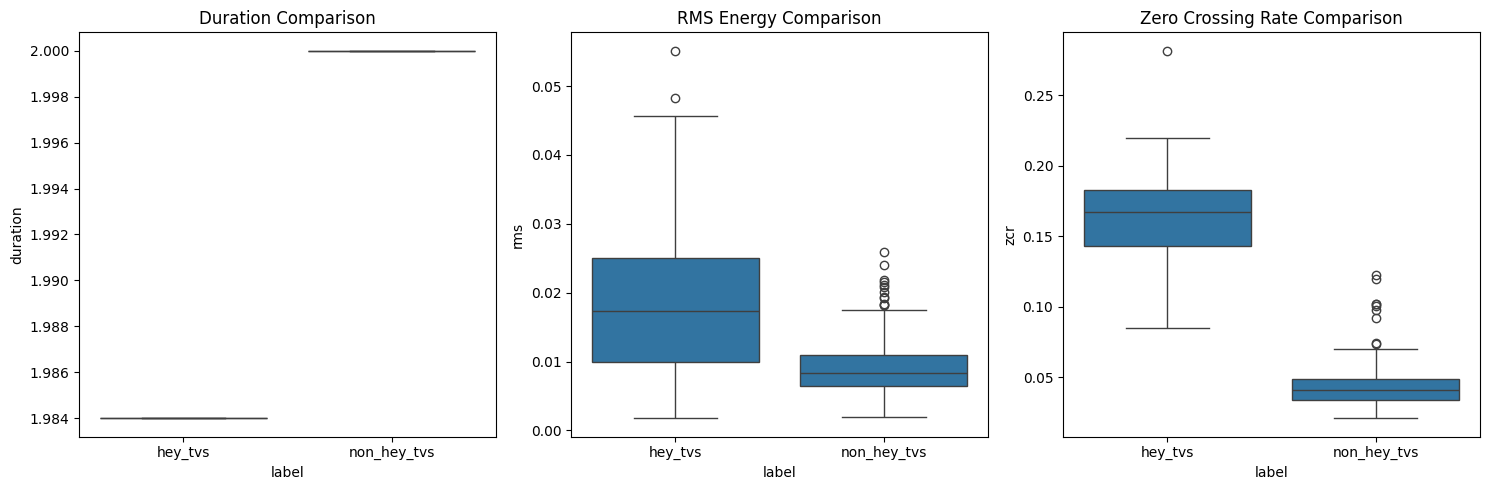

In [ ]:
# Show some basic statistics
# print("\nDescriptive Statistics:\n")
# print(df.groupby('label')[['duration', 'rms', 'zcr']].describe())

# Show basic statistics as a clean DataFrame
descriptive_stats = df.groupby('label')[['duration', 'rms', 'zcr']].describe().transpose()
display(descriptive_stats)  # Works in Jupyter Notebooks


# Plotting distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='label', y='duration')
plt.title('Duration Comparison')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='label', y='rms')
plt.title('RMS Energy Comparison')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='label', y='zcr')
plt.title('Zero Crossing Rate Comparison')

plt.tight_layout()
plt.show()

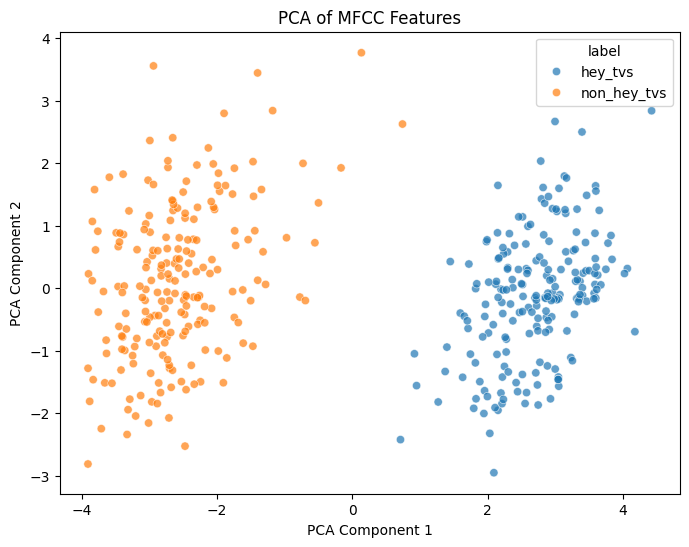

In [6]:
# PCA for MFCCs to visualize clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mfcc_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[mfcc_cols]
y = df['label']

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, alpha=0.7)
plt.title('PCA of MFCC Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()